### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_excel(r"C:\Users\Anakha\Downloads\iris (1).xls")
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for null values

In [6]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
df.isna().sum()/df.shape[0]*100

SL                4.666667
SW                4.000000
PL                4.000000
PW                0.000000
Classification    0.000000
dtype: float64

### Filling missing values

In [8]:
SL_med=df['SL'].median()
df['SL']=df['SL'].fillna(SL_med)

In [9]:
SW_med=df['SW'].median()
df['SW']=df['SW'].fillna(SW_med)

In [10]:
PL_med=df['PL'].median()
df['PL']=df['PL'].fillna(PL_med)

In [11]:
df.isna().any()

SL                False
SW                False
PL                False
PW                False
Classification    False
dtype: bool

In [12]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for outliers

<AxesSubplot:>

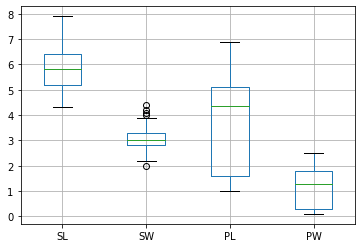

In [13]:
df[['SL','SW','PL','PW']].boxplot()

In [14]:
# Removing outliers from SW

In [15]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
print(IQR)

0.4500000000000002


<ipython-input-15-d3e4646aead8>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(df['SW'],25,interpolation='midpoint')
<ipython-input-15-d3e4646aead8>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(df['SW'],50,interpolation='midpoint')
<ipython-input-15-d3e4646aead8>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(

In [16]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in df['SW']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)


In [17]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [18]:
ind=df['SW']>up_lim
df.loc[ind].index
df.drop(df.loc[ind].index, inplace=True)

In [19]:
df.shape

(146, 5)

In [20]:
# Dividing the dataset into training and test data

In [21]:
ind_f=['SL','SW','PL','PW']
ind_f

['SL', 'SW', 'PL', 'PW']

In [22]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [23]:
x=df[ind_f]
y=df['Classification']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=143)

# LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

In [28]:
confusion_matrix(y_test,y_pred)

array([[11,  1,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred)

0.9333333333333333

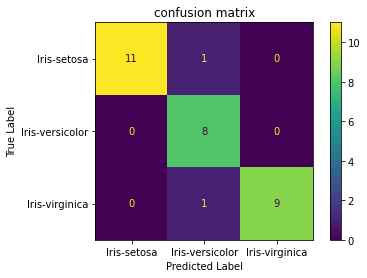

In [30]:
plot_confusion_matrix(lr,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_cls=KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(x_train,y_train)
y_pred=knn_cls.predict(x_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[11,  1,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred)

0.9666666666666667

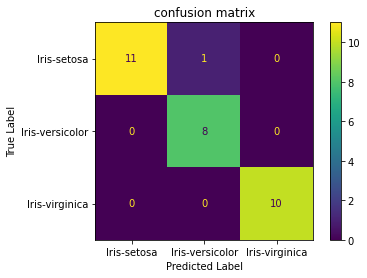

In [35]:
plot_confusion_matrix(knn_cls,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SVM

In [36]:
from sklearn.svm import SVC

In [37]:
sv=SVC(kernel="rbf",degree=5)
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)

In [38]:
confusion_matrix(y_test,y_pred)

array([[11,  1,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]], dtype=int64)

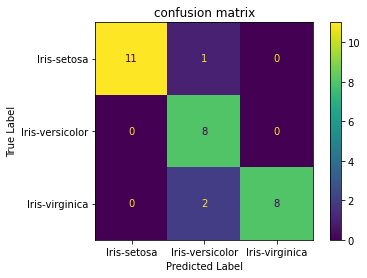

In [39]:
plot_confusion_matrix(sv,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
accuracy_score(y_test,y_pred)

0.9

In [41]:
sv=SVC(kernel="linear",degree=5)
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [43]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

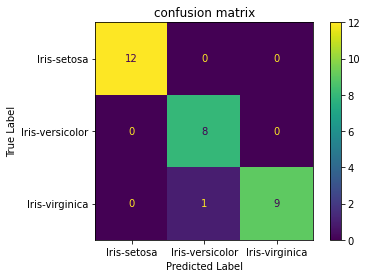

In [44]:
plot_confusion_matrix(sv,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# DECISION TREE

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [48]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

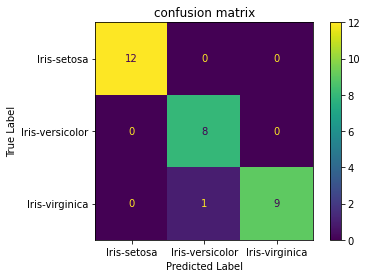

In [49]:
plot_confusion_matrix(dc,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
y_pred=rc.predict(x_test)

In [52]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [53]:
confusion_matrix(y_pred,y_test)

array([[12,  0,  0],
       [ 0,  8,  2],
       [ 0,  0,  8]], dtype=int64)

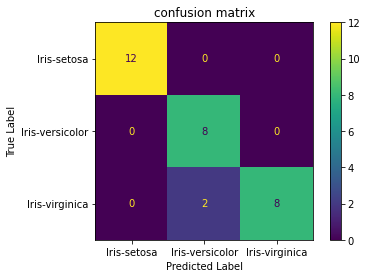

In [54]:
plot_confusion_matrix(rc,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Conclusion

From the accuracy scores of the classification models it is found that K Nearest Neighbour, Support Vector Machine and Decision Tree have same accuracy ie 0.967

Random Forest Classifier and Logistic Regression have same accuracy ie 0.9333